# Credit EDA Case Study

In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)

## Reading data

In [2]:
# Reading application data
appl = pd.read_csv("application_data.csv")
appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Determining the shape of application data
appl.shape

(307511, 122)

In [4]:
# Analysing the columns of application data
appl.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# determining null values
appl.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
# percentage of null values
appl.isnull().sum()*100/len(appl)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [8]:
# checking the columns that have more than 50 percent null values 
nulldata=appl.isnull().sum()
nulldata=nulldata[nulldata.values>(0.5*len(nulldata))]
nulldata

AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
EXT_SOURCE_1                  173378
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 64, dtype: int64

In [9]:
# Removing the columns wit null values with more than 50 percent null values 
appl.drop(labels = nulldata.index, axis='columns', inplace=True)

In [10]:
appl.shape

(307511, 58)

In [11]:
#verify other colums for nulls
appl.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

In [12]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 58 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED            

In [13]:
# Checking for ouliers
appl.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,0.028663,-12413.000000,-289.000000,-2010.000000,-172

In [14]:
appl.AMT_ANNUITY.quantile(0.99)

70006.5

In [15]:
# Checking the row "AMT_ANNUITY" for missing values and replacing it with median as the maximum value is very large than the 99 percrntile  
appl.loc[appl.AMT_ANNUITY.isnull(),'AMT_ANNUITY']= appl.AMT_ANNUITY.median()

In [16]:
appl.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [17]:
appl.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,1,1,1,1,1,0,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# checking for value counts of random columns
appl.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [19]:
appl.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [20]:
appl.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [21]:
# "The column "CODE_GENDER" has value XNA which is not appropriate, so replacing it with the mode
appl.loc[appl.CODE_GENDER=='XNA', 'CODE_GENDER'] = appl.CODE_GENDER.mode()

In [22]:
appl.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [23]:
# Checking other columns with the value 'XNA'
for x in appl.columns:
    if 'XNA' in appl[x].value_counts():
        print(x)

ORGANIZATION_TYPE


In [24]:
# Checking value_counts for "ORGANIZATION_TYPE"
appl.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [25]:
# Removing the rows with the "ORGANIZATION_TYPE" as 'XNA' as they are only 18% of values and wouldn't impact
appl.drop(index = appl[appl.ORGANIZATION_TYPE == 'XNA'].index , axis = 0, inplace=True)

In [26]:
appl[appl.ORGANIZATION_TYPE == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21


In [27]:
# checking for datatypes and do necessary typecasting
appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 58 columns):
SK_ID_CURR                     252137 non-null int64
TARGET                         252137 non-null int64
NAME_CONTRACT_TYPE             252137 non-null object
CODE_GENDER                    252133 non-null object
FLAG_OWN_CAR                   252137 non-null object
FLAG_OWN_REALTY                252137 non-null object
CNT_CHILDREN                   252137 non-null int64
AMT_INCOME_TOTAL               252137 non-null float64
AMT_CREDIT                     252137 non-null float64
AMT_ANNUITY                    252137 non-null float64
NAME_INCOME_TYPE               252137 non-null object
NAME_EDUCATION_TYPE            252137 non-null object
NAME_FAMILY_STATUS             252137 non-null object
NAME_HOUSING_TYPE              252137 non-null object
REGION_POPULATION_RELATIVE     252137 non-null float64
DAYS_BIRTH                     252137 non-null int64
DAYS_EMPLOYED            

In [28]:
appl.nunique().sort_values()

FLAG_DOCUMENT_21                    2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_8                     2
REG_REGION_NOT_LIVE_REGION          2
FLAG_WORK_PHONE                     2
REG_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_4                     2
FLAG_EMP_PHONE                      2
FLAG_DOCUMENT_10                    2
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
FLAG_DOCUMEN

In [29]:
#Changing the datatype of SK_ID_CURR to object
appl["SK_ID_CURR"] = appl.SK_ID_CURR.astype("object")  

In [30]:
#Changing the datatype of FLAG_DOCUMENT columns to object
appl.iloc[:,appl.columns.str.startswith("FLAG_")] = appl.iloc[:,appl.columns.str.startswith("FLAG_")].astype("object")

In [31]:
#changing ratings to object datatype
appl.iloc[:,appl.columns.str.contains("RATING")] = appl.iloc[:,appl.columns.str.contains("RATING")].astype("object")

In [32]:
#changing datatype of columns with live and work
appl.iloc[:,appl.columns.str.contains("_LIVE") ] = appl.iloc[:,appl.columns.str.contains("_LIVE") ].astype("object")
appl.iloc[:,appl.columns.str.contains("_WORK") ] = appl.iloc[:,appl.columns.str.contains("_WORK") ].astype("object")


In [33]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 58 columns):
SK_ID_CURR                     252137 non-null object
TARGET                         252137 non-null int64
NAME_CONTRACT_TYPE             252137 non-null object
CODE_GENDER                    252133 non-null object
FLAG_OWN_CAR                   252137 non-null object
FLAG_OWN_REALTY                252137 non-null object
CNT_CHILDREN                   252137 non-null int64
AMT_INCOME_TOTAL               252137 non-null float64
AMT_CREDIT                     252137 non-null float64
AMT_ANNUITY                    252137 non-null float64
NAME_INCOME_TYPE               252137 non-null object
NAME_EDUCATION_TYPE            252137 non-null object
NAME_FAMILY_STATUS             252137 non-null object
NAME_HOUSING_TYPE              252137 non-null object
REGION_POPULATION_RELATIVE     252137 non-null float64
DAYS_BIRTH                     252137 non-null int64
DAYS_EMPLOYED           

In [34]:
appl.AMT_INCOME_TOTAL.describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [35]:
# The data types seems to be correct. Binning the "AMT_INCOME_TOTAL" into the column "INCOME_RANGE" 
appl["INCOME_RANGE"] = pd.cut(appl.AMT_INCOME_TOTAL, bins = [0,100000,200000,300000,400000,500000,10000000000], labels =["0-1L","1L-2L","2L-3L","3L-4L","4L-5L","5L & above"])
appl["INCOME_RANGE"] = appl["INCOME_RANGE"].astype("object")

In [36]:
appl[["AMT_INCOME_TOTAL","INCOME_RANGE"]].head()

,AMT_INCOME_TOTAL,INCOME_RANGE
0,202500.0,2L-3L
1,270000.0,2L-3L
2,67500.0,0-1L
3,135000.0,1L-2L
4,121500.0,1L-2L


In [37]:
appl.AMT_CREDIT.describe()

count    2.521370e+05
mean     6.113985e+05
std      4.065272e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [38]:
# Creating bins for "AMT_CREDIT" into the colum "CREDIT_RANGE"
appl["CREDIT_RANGE"] = pd.cut(appl.AMT_CREDIT, bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000000], labels =["0-1L","1L-2L","2L-3L","3L-4L","4L-5L","5L-6L","6L-7L","7L-8L","8L-9L","9L-10L","10L & above"])
appl["CREDIT_RANGE"] = appl.CREDIT_RANGE.astype("object")

In [39]:
appl[["AMT_CREDIT","CREDIT_RANGE"]].head()

,AMT_CREDIT,CREDIT_RANGE
0,406597.5,4L-5L
1,1293502.5,10L & above
2,135000.0,1L-2L
3,312682.5,3L-4L
4,513000.0,5L-6L


In [40]:
# Dividing the data set into two based on target
# creating df1 for target=1(clients with payemnt difficulties) and df0 for target=0(all other)
df0 = appl[appl.TARGET == 0]
df1 = appl[appl.TARGET == 1]

In [41]:
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,INCOME_RANGE,CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2L-3L,10L & above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0-1L,1L-2L
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1L-2L,3L-4L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1L-2L,5L-6L
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0-1L,4L-5L


In [42]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2L-3L,4L-5L
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1L-2L,9L-10L
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2L-3L,10L & above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1L-2L,2L-3L
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,-1038,1,1,0,1,0,0,1.0,2,2,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,-591.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3L-4L,9L-10L


In [43]:
# calculating imbalance percentage for clients with payment difficulties and all others
df0.shape

(230302, 60)

In [44]:
df1.shape

(21835, 60)

In [45]:
round(len(df0)/len(df1),2)

10.55

The imbalance ratio is 10.55

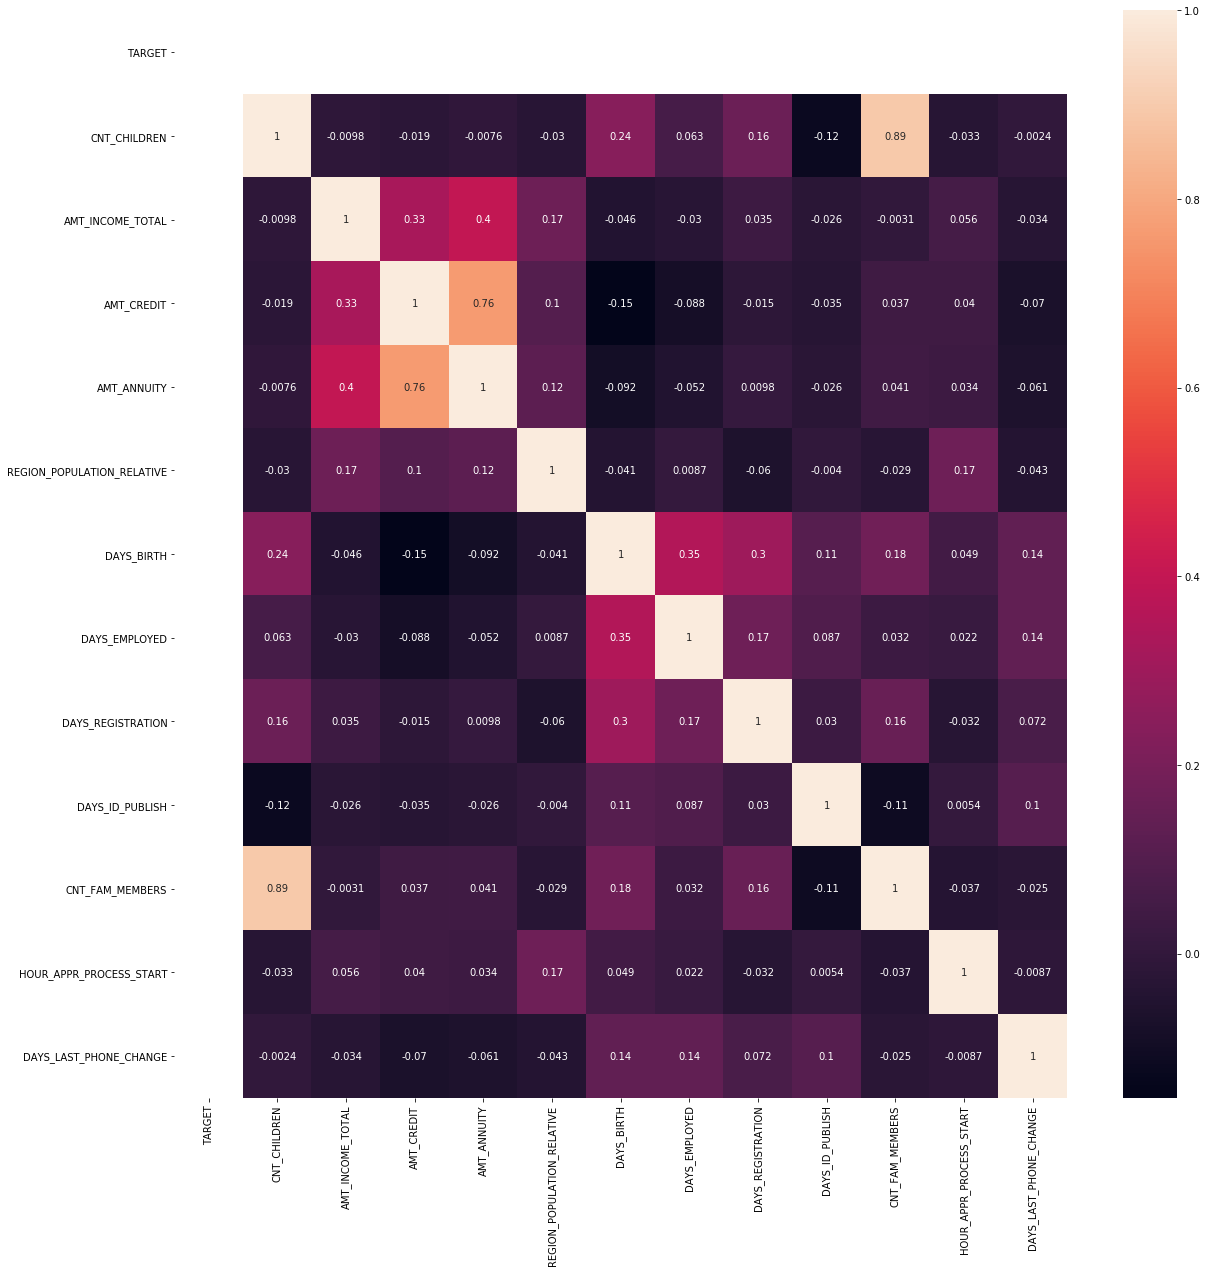

In [46]:
# Finding correlation for df0
plt.figure(figsize=(20,20))
ax = sns.heatmap(df0.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim( bottom+0.5,top-0.5)
plt.show()

In [47]:
# creating a data frame for correlation of df0
df0.corr()
df0.corr().unstack().reset_index()
corr = df0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index().dropna(subset = [0])
corr_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df['Corr_abs'] = abs(corr_df['Correlation_Value'])
corr_df.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df

,VAR1,VAR2,Correlation_Value,Corr_abs
131,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893276,0.893276
55,AMT_ANNUITY,AMT_CREDIT,0.762103,0.762103
54,AMT_ANNUITY,AMT_INCOME_TOTAL,0.400752,0.400752
97,DAYS_EMPLOYED,DAYS_BIRTH,0.352662,0.352662
41,AMT_CREDIT,AMT_INCOME_TOTAL,0.326155,0.326155
...,...,...,...,...
53,AMT_ANNUITY,CNT_CHILDREN,-0.007612,0.007612
152,HOUR_APPR_PROCESS_START,DAYS_ID_PUBLISH,0.005436,0.005436
122,DAYS_ID_PUBLISH,REGION_POPULATION_RELATIVE,-0.004014,0.004014
132,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,-0.003133,0.003133


From both the heat map and the table above we can infer that
1. The family members count and children count are highly correlated.
2. The Total income and the credit amount are positively correlated.
3. The correlation is least for DAYS_LAST_PHONE_CHANGE and Children count.

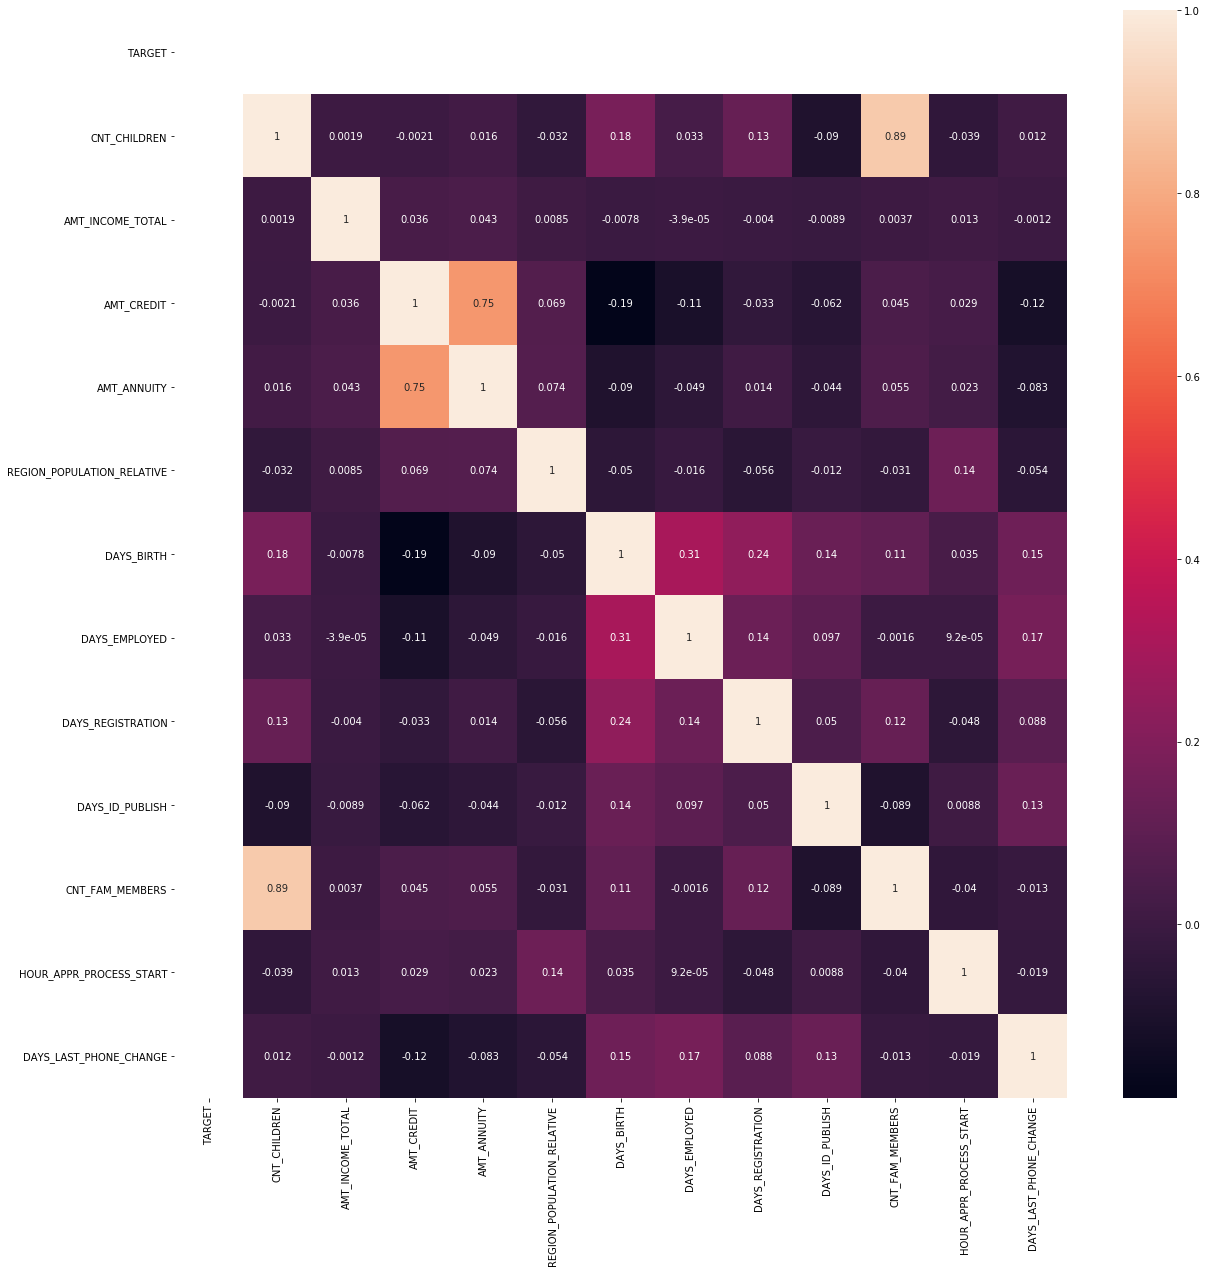

In [48]:
# Finding correlation for df1
plt.figure(figsize=(20,20))
ax = sns.heatmap(df1.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim( bottom+0.5,top-0.5)
plt.show()

In [49]:
# creating a data frame for correlation of df1
df1.corr()
df1.corr().unstack().reset_index()
corr = df1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index().dropna(subset = [0])
corr_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df['Corr_abs'] = abs(corr_df['Correlation_Value'])
corr_df.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df

,VAR1,VAR2,Correlation_Value,Corr_abs
131,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893829,0.893829
55,AMT_ANNUITY,AMT_CREDIT,0.748708,0.748708
97,DAYS_EMPLOYED,DAYS_BIRTH,0.307018,0.307018
110,DAYS_REGISTRATION,DAYS_BIRTH,0.241202,0.241202
81,DAYS_BIRTH,AMT_CREDIT,-0.189512,0.189512
...,...,...,...,...
27,AMT_INCOME_TOTAL,CNT_CHILDREN,0.001872,0.001872
137,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.001630,0.001630
158,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,-0.001184,0.001184
150,HOUR_APPR_PROCESS_START,DAYS_EMPLOYED,0.000092,0.000092


From both the heat map and the table above we can infer that

1. The family members count and children count are highly correlated.
2. The Credit amount and the annity amount are positively correlated.
3. The correlation is least for days employed and Total Income.

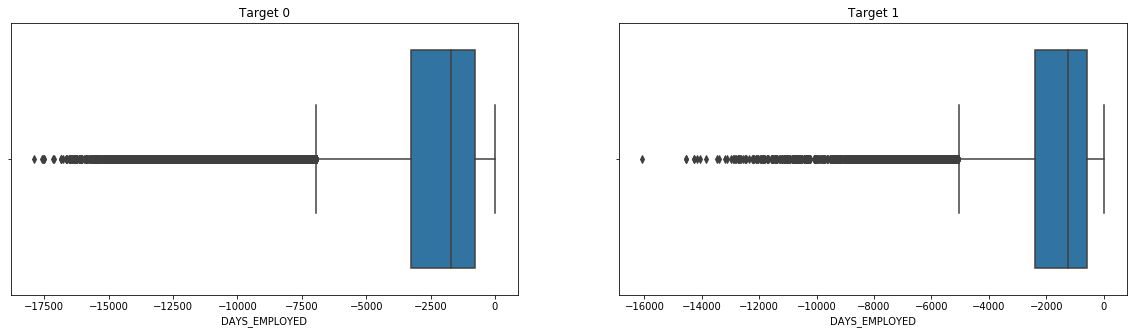

In [50]:
# univariate analysis on "DAYS_EMPLOYED"
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(df0.DAYS_EMPLOYED)
plt.title("Target 0")

plt.subplot(1,2,2)
sns.boxplot(df1.DAYS_EMPLOYED)
plt.title("Target 1")
plt.show()

As per the box plots above it can be inferred that clients with payment difficulties are employed for lesser number of days than the other clients

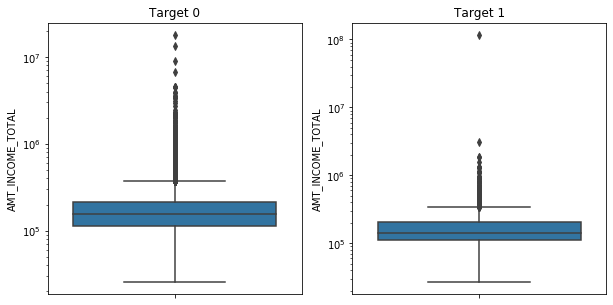

In [51]:
# Total Income
plt.figure(figsize = (10,5) )

plt.subplot(1,2,1)
sns.boxplot(data = df0, y = "AMT_INCOME_TOTAL")
plt.yscale('log')
plt.title("Target 0")

plt.subplot(1,2,2)
sns.boxplot(data = df1, y = "AMT_INCOME_TOTAL")
plt.title("Target 1")
plt.yscale('log')
plt.show()

1. Target 0 clients seems to have more outliers compared to that of Target 1 clients.
2. The median of Income total for Target 0 is higher than that of the Target 1.
3. The difference between the 99 percentile and the outler seems to be bigger for clients with payment difficulties.

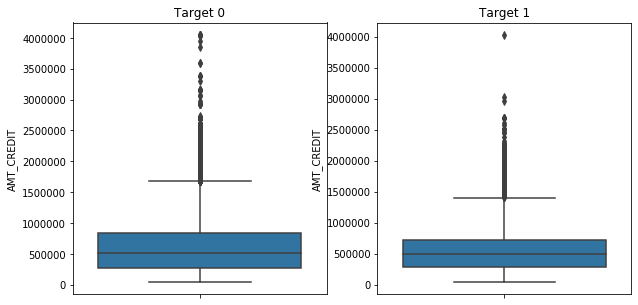

In [52]:
# Credit Amount
plt.figure(figsize = (10,5) )

plt.subplot(1,2,1)
sns.boxplot(data = df0, y = "AMT_CREDIT")
plt.title("Target 0")

plt.subplot(1,2,2)
sns.boxplot(data = df1, y = "AMT_CREDIT")
plt.title("Target 1")
plt.show()

1. For Credit Amount also Target 0 seems to have more number of outliers
2. The median for both the Target clients is same but the IQR and maximum value is higher for Target 0 clients.
3. The difference between 99 percentile and the outlier is higher for Target 1 clients.

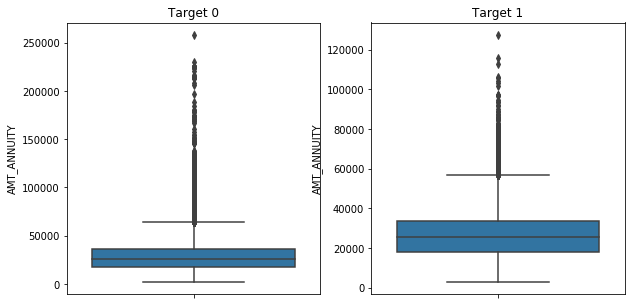

In [53]:
# Total Annuity
plt.figure(figsize = (10,5) )

plt.subplot(1,2,1)
sns.boxplot(data = df0, y = "AMT_ANNUITY")
plt.title("Target 0")

plt.subplot(1,2,2)
sns.boxplot(data = df1, y = "AMT_ANNUITY")
plt.title("Target 1")

plt.show()

Below can be concluded from the above box plots:
1. Outliers are higher for Target 0 clients.
2. The maximum value of annuity amount for Target 0 clients is higher.

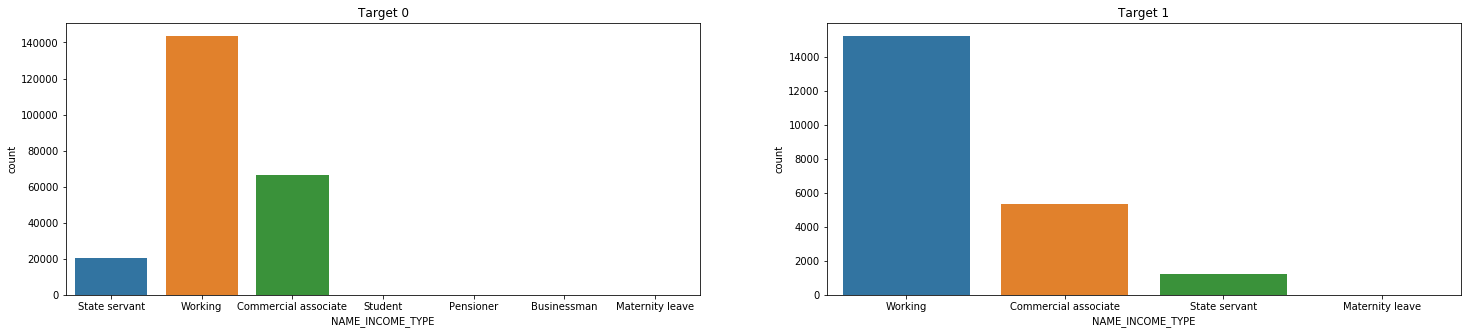

In [54]:
#univariate analysis on "INCOME_TYPE" for target 0 and target 1 clients
plt.figure(figsize =(25,5))
plt.subplot(1,2,1)
sns.countplot(df0.NAME_INCOME_TYPE)
plt.title("Target 0")

plt.subplot(1,2,2)
sns.countplot(df1.NAME_INCOME_TYPE)
plt.title("Target 1")

plt.show()

Based on the above plots we can conclude that 
1. The income types Student, Pensioner, Businessman have no payment difficulties.
2. The working clients have more payment difficulties than that of others.
 

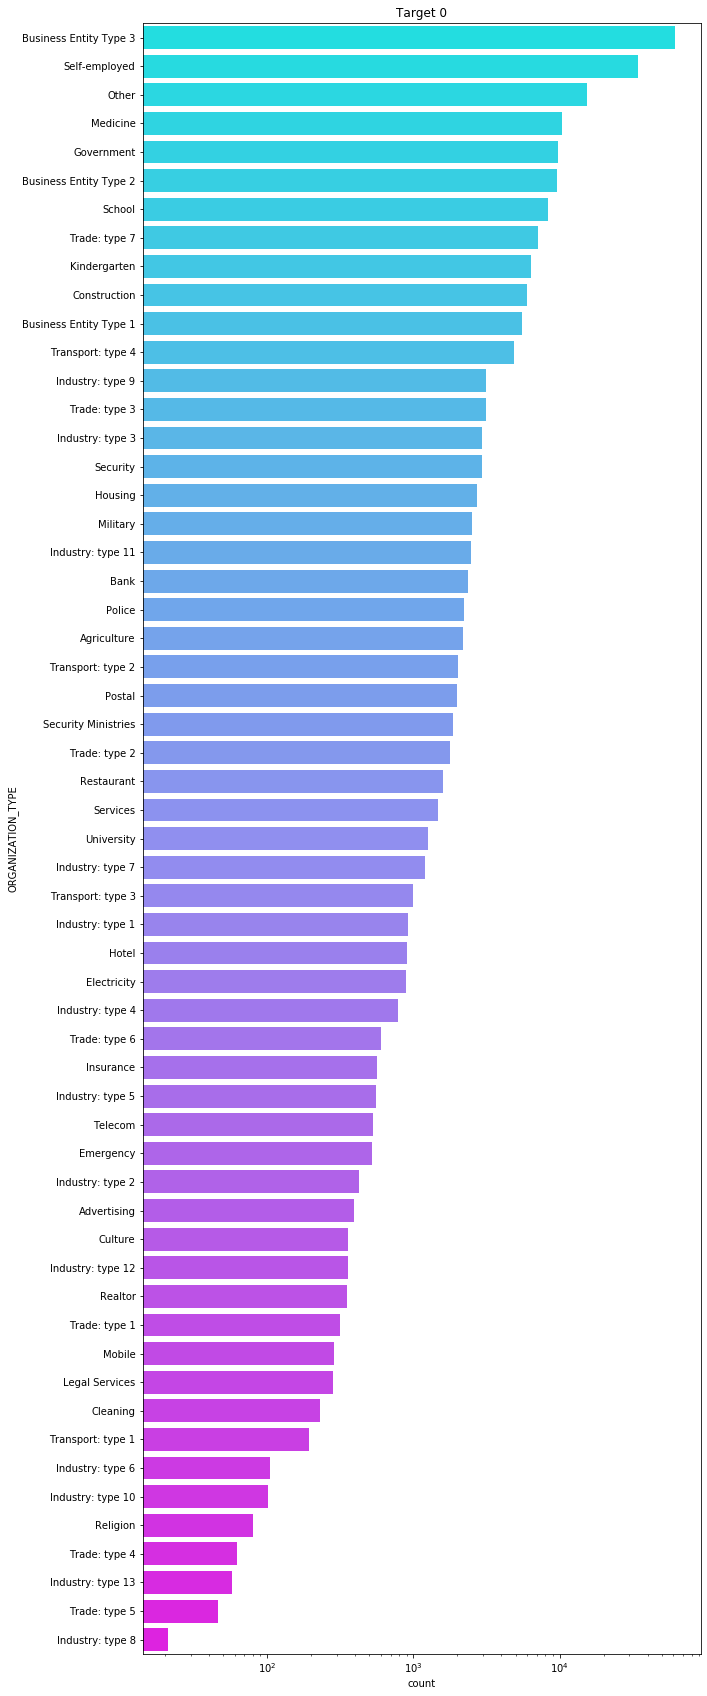

In [55]:
#univariate analysis on "ORGANISATION_TYPE" for target 0 and target 1 clients
plt.figure(figsize =(10,30))

sns.countplot(data=df0,y='ORGANIZATION_TYPE',order=df0['ORGANIZATION_TYPE'].value_counts().index, palette='cool')
plt.xscale('log')
plt.title("Target 0")
plt.show()

Below can be concluded from the above graph:
1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ , ‘Government’ and 'Business Entity Type 2'.
2. Less clients are from Industry type 8,Trade : type 5, Industry : type 13, Trade: type 4 and Religion.

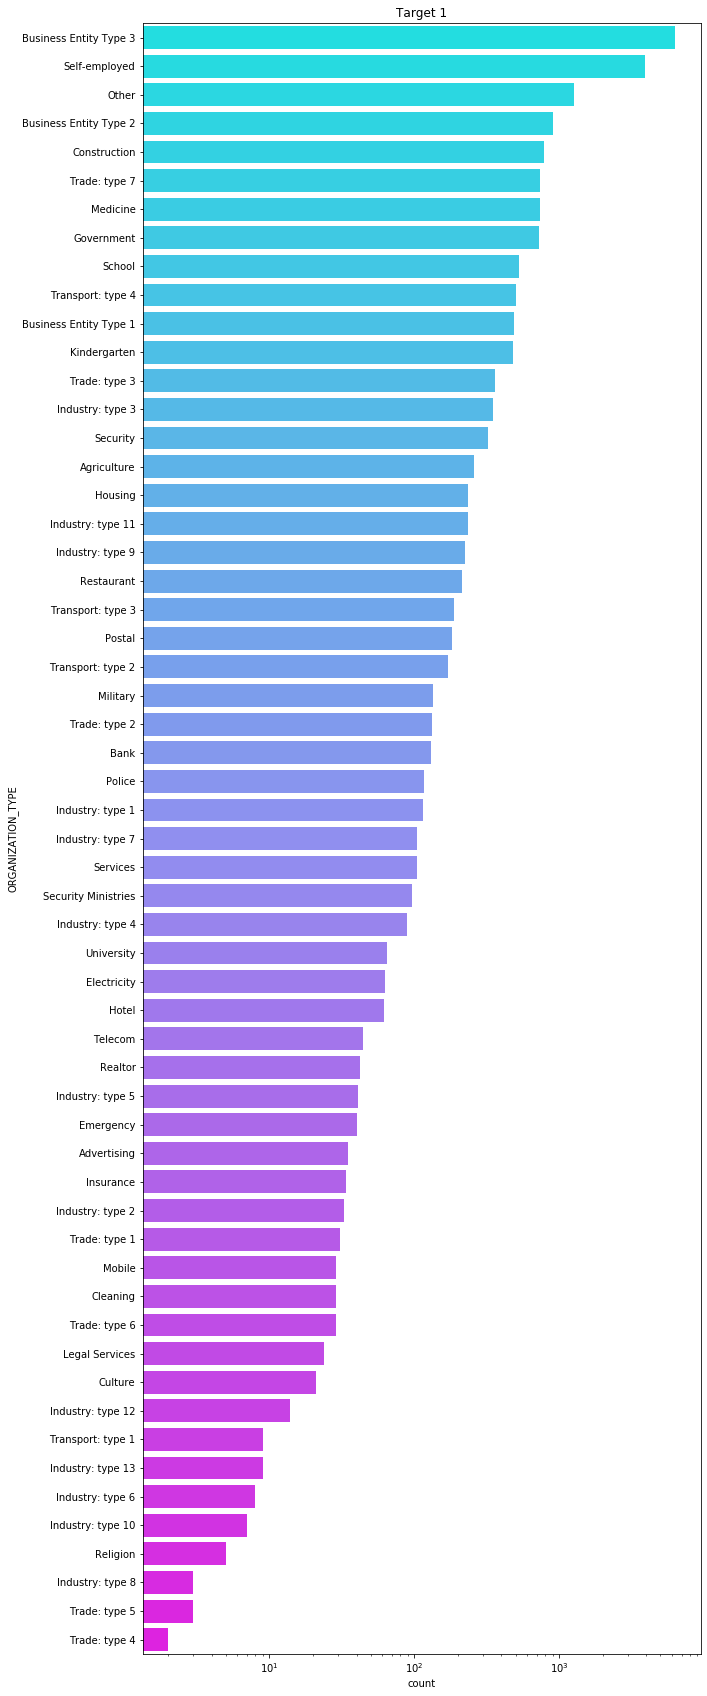

In [56]:
plt.figure(figsize =(10,30))
sns.countplot(data=df1,y='ORGANIZATION_TYPE',order=df1['ORGANIZATION_TYPE'].value_counts().index, palette='cool')
plt.xscale('log')
plt.title("Target 1")
plt.show()

Below can be concluded from the above graph for Target 1 clients:

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , 'Business Entity Type 2' and 'Construction'.
Less clients are from Trade : type 4 , type 5, Industry: type 8 , Religion and Industry: type 10.

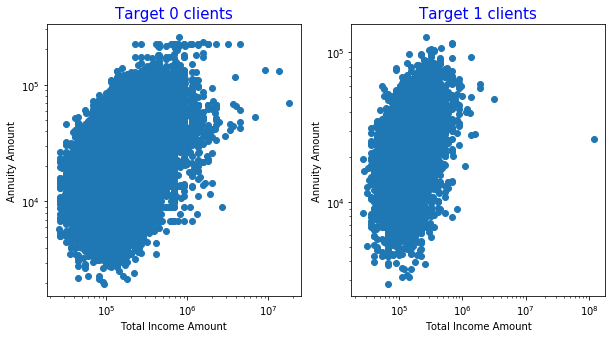

In [57]:
# Bivariate Analysis - Continuous - Continuos
# AMT_INCOME_TOTAL vs AMT_ANNUITY
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x = df0.AMT_INCOME_TOTAL , y = df0.AMT_ANNUITY)
plt.title("Target 0 clients", fontdict = {'color':'blue', 'size':15})
plt.xlabel("Total Income Amount")
plt.ylabel("Annuity Amount")
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,2,2)
plt.scatter(x = df1.AMT_INCOME_TOTAL , y = df1.AMT_ANNUITY)
plt.title("Target 1 clients", fontdict = {'color':'blue', 'size':15})
plt.xlabel("Total Income Amount")
plt.ylabel("Annuity Amount")
plt.xscale('log')
plt.yscale('log')
plt.show()

From the above scatter plots it can be inferred that 
1. The total income range for Target 0 is higher.
2. The annuity amount is higher for higher income clients.
3. In Target 1 clients seems to have a outlier.

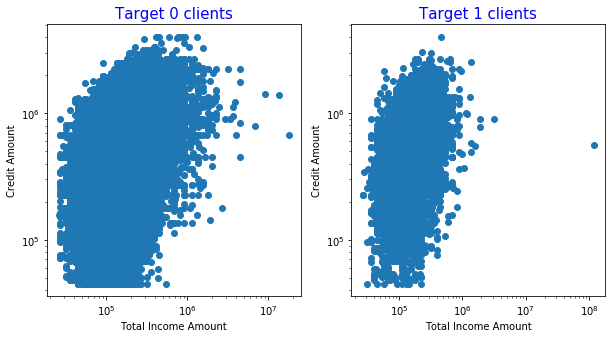

In [58]:
# Bivariate Analysis - Continuous - Continuos
# AMT_INCOME_TOTAL vs AMT_CREDIT
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x = df0.AMT_INCOME_TOTAL , y = df0.AMT_CREDIT)
plt.title("Target 0 clients", fontdict = {'color':'blue', 'size':15})
plt.xlabel("Total Income Amount")
plt.ylabel("Credit Amount")
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,2,2)
plt.scatter(x = df1.AMT_INCOME_TOTAL , y = df1.AMT_CREDIT)
plt.title("Target 1 clients", fontdict = {'color':'blue', 'size':15})
plt.xlabel("Total Income Amount")
plt.ylabel("Credit Amount")
plt.xscale('log')
plt.yscale('log')
plt.show()

From the above plots it can be concluded that clients with higher income has higher credit amount.

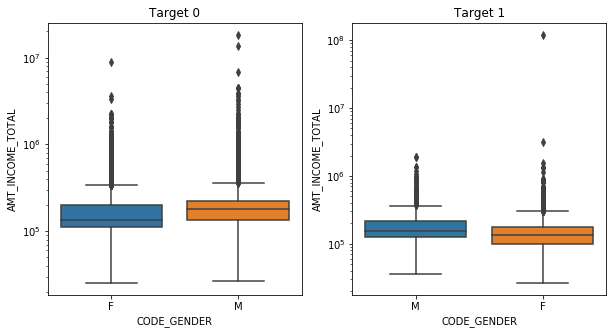

In [59]:
# Bivariate Analysis - Continuos - Categorical
# Gender vs Income
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data = df0 , x='CODE_GENDER',y = "AMT_INCOME_TOTAL")
plt.yscale('log')
plt.title("Target 0")

plt.subplot(1,2,2)
sns.boxplot(data = df1 , x='CODE_GENDER',y = "AMT_INCOME_TOTAL")
plt.yscale('log')
plt.title("Target 1")

plt.show()

From the above it can be concluded that 
1. For both the clients males have higher median value for Income than that of the females.
2. The outliers are more in Traget 0.

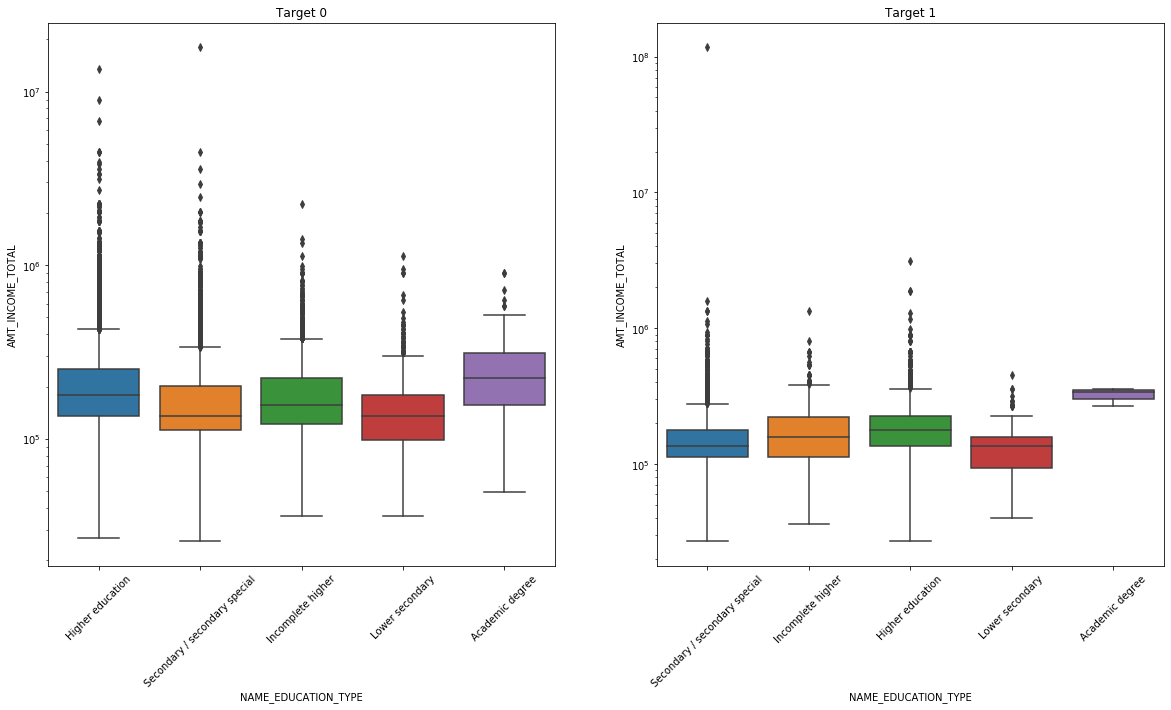

In [60]:
# Bivariate Analysis - Continuos - Categorical
# Income Vs education type
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.boxplot(data = df0 , x='NAME_EDUCATION_TYPE',y = "AMT_INCOME_TOTAL")
plt.yscale('log')
plt.title("Target 0")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data = df1 , x='NAME_EDUCATION_TYPE',y = "AMT_INCOME_TOTAL")
plt.yscale('log')
plt.title("Target 1")
plt.xticks(rotation=45)

plt.show()

It can be inferred that:
    1. There are very few clients with academic degree and payment difficulties.  
    2. Clients with higher education has high income total and are in Target 0.

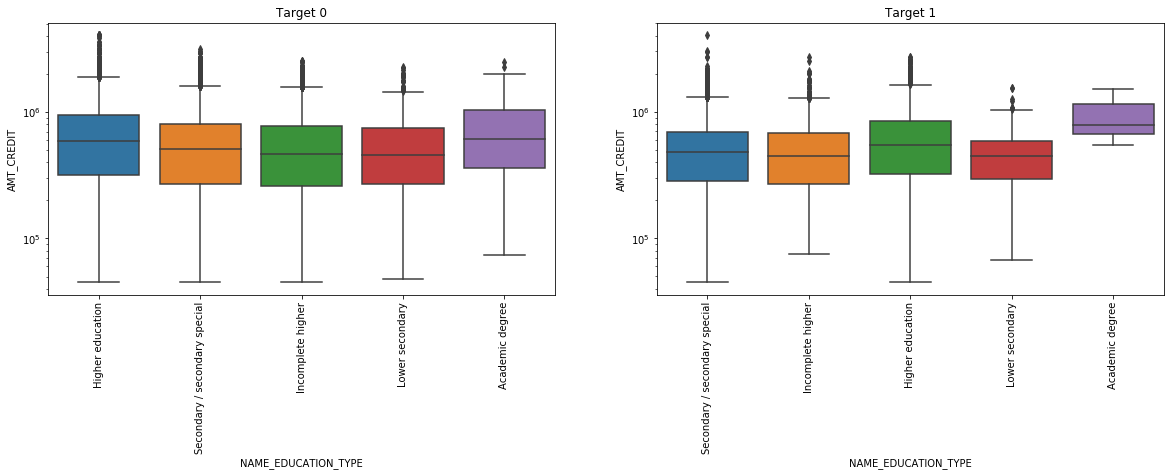

In [61]:
# credit Vs education type
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(data = df0 , x='NAME_EDUCATION_TYPE',y = "AMT_CREDIT")
plt.yscale('log')
plt.title("Target 0")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data = df1 , x='NAME_EDUCATION_TYPE',y = "AMT_CREDIT")
plt.yscale('log')
plt.title("Target 1")
plt.xticks(rotation=90)

plt.show()

Form the above plots we can conclude that:
1. Clients with academic degree seems to get higher credit amount in Target 0 and Target 1.
2. The 75th percentile is least for Lower Secondary education type in both.
3. In Target 0 Higher education has more outliers while Target 1 has more outliers for Secondary/secondary special education type.

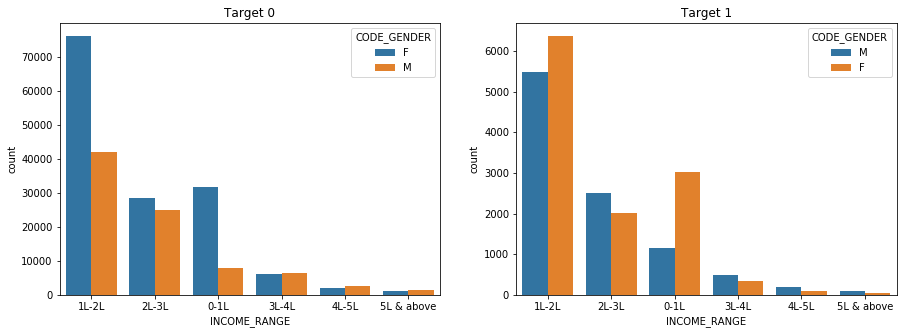

In [62]:
# Bivariate Analysis - Categorical - Categorical
# Income Range and Gender
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data= df0, x ='INCOME_RANGE', order = df0['INCOME_RANGE'].value_counts().index, hue ="CODE_GENDER")
plt.title("Target 0")

plt.subplot(1,2,2)
sns.countplot(data= df1, x ='INCOME_RANGE',order = df1['INCOME_RANGE'].value_counts().index, hue ="CODE_GENDER")
plt.title("Target 1")

plt.show()

1. The female clients with income range 1Lakh to 2Lakh are high in both Target 1 and 0.
2. The female clients with income range as 5 lakh and above are the least in both cases.

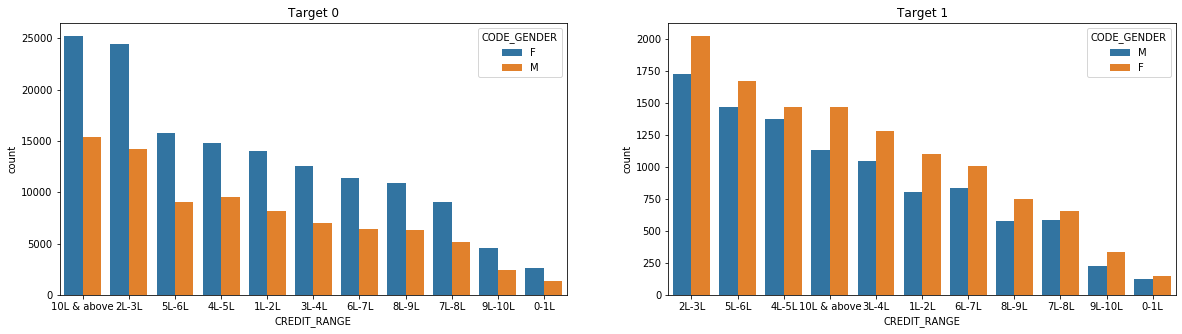

In [63]:
# Credit range and Gender
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(data= df0, x ='CREDIT_RANGE', order = df0['CREDIT_RANGE'].value_counts().index, hue ="CODE_GENDER")
plt.title("Target 0")

plt.subplot(1,2,2)
sns.countplot(data= df1, x ='CREDIT_RANGE',order = df1['CREDIT_RANGE'].value_counts().index, hue ="CODE_GENDER")
plt.title("Target 1")

plt.show()

1. In both the target clients for all the credit ranges female are more than the males.
2. In Target 0 most of the clients are in the credit range of 10L and above while in Target 1 they are in rage of 2L-3L.

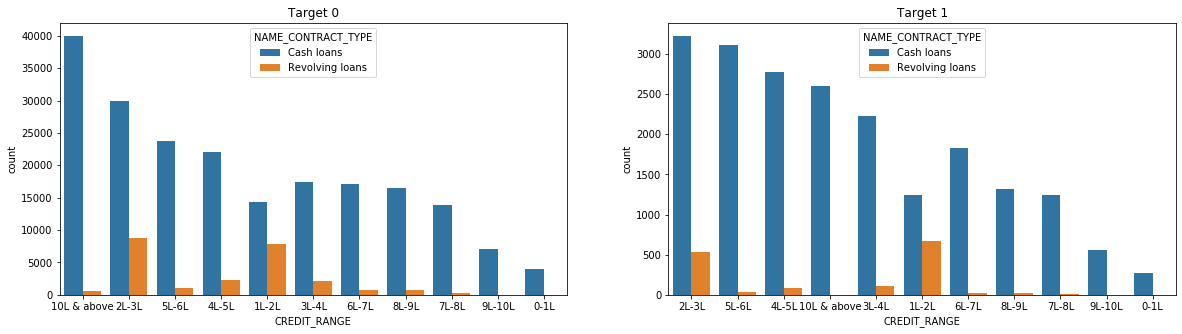

In [64]:
# contract Type and Credit range

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(data= df0, x ='CREDIT_RANGE', order = df0['CREDIT_RANGE'].value_counts().index, hue ="NAME_CONTRACT_TYPE")
plt.title("Target 0")

plt.subplot(1,2,2)
sns.countplot(data= df1, x ='CREDIT_RANGE',order = df1['CREDIT_RANGE'].value_counts().index, hue ="NAME_CONTRACT_TYPE")
plt.title("Target 1")

plt.show()

1. The cash loans are more for both Target 0 and Target 1 clients.
2. Target 0 clients with credit range 10L and above have more cash loans while Target 1 with credit range of 2L-3L.
3. Both have the least credit range of 0-1L

In [65]:
# Reading the Previous application data
prev_appl = pd.read_csv("previous_application.csv")
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#Checking for missing values
prev_appl.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [67]:
# Removing the columns with  ore than 50% of null values
nulldata=prev_appl.isnull().sum()
nulldata=nulldata[nulldata.values>(0.5*len(nulldata))]
prev_appl.drop(labels = nulldata.index, axis = 1, inplace =True)

In [68]:
prev_appl.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [69]:
# Checking other columns with the value 'XNA'
for x in prev_appl.columns:
    if 'XNA' in prev_appl[x].value_counts():
        print(x)

NAME_CONTRACT_TYPE
NAME_CASH_LOAN_PURPOSE
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP


In [70]:
prev_appl.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [71]:
prev_appl.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

In [72]:
#As the 'NAME_CASH_LOAN_PURPOSE' coulumn has very large number of values with 'XNA' and 'XAP' deleting those rows from the data
prev_appl.drop(index = prev_appl[(prev_appl["NAME_CASH_LOAN_PURPOSE"] == 'XNA') | (prev_appl["NAME_CASH_LOAN_PURPOSE"] == 'XAP')].index, axis =0, inplace=True)

In [73]:
for x in prev_appl.columns:
    if 'XNA' in prev_appl[x].value_counts() or 'XAP' in prev_appl[x].value_counts():
        print(x)
        print(prev_appl[x].value_counts(normalize=True))

NAME_PAYMENT_TYPE
Cash through the bank                        0.916709
XNA                                          0.077777
Non-cash from your account                   0.004595
Cashless from the account of the employer    0.000919
Name: NAME_PAYMENT_TYPE, dtype: float64
CODE_REJECT_REASON
XAP       0.410311
HC        0.319107
LIMIT     0.131830
SCO       0.074201
VERIF     0.033604
SCOFR     0.020406
XNA       0.007568
CLIENT    0.002944
SYSTEM    0.000029
Name: CODE_REJECT_REASON, dtype: float64
NAME_CLIENT_TYPE
Repeater     0.807870
New          0.143089
Refreshed    0.048280
XNA          0.000761
Name: NAME_CLIENT_TYPE, dtype: float64
NAME_GOODS_CATEGORY
XNA    1.0
Name: NAME_GOODS_CATEGORY, dtype: float64
NAME_PORTFOLIO
Cash    0.996223
XNA     0.003777
Name: NAME_PORTFOLIO, dtype: float64
NAME_PRODUCT_TYPE
walk-in    0.982538
x-sell     0.013686
XNA        0.003777
Name: NAME_PRODUCT_TYPE, dtype: float64
NAME_SELLER_INDUSTRY
XNA                     0.918978
Connectivity        

In [74]:
# 'NAME_GOODS_CATEGORY' coulmn seems to have only 'XNA' as values and 'NAME_SELLER_INDUSTRY' has 91% values with the value 'XNA'. Therefore dropping those columns
prev_appl.drop(columns = ["NAME_GOODS_CATEGORY","NAME_SELLER_INDUSTRY"], axis = 1, inplace=True)

In [75]:
#checking for datatypes
prev_appl.nunique().sort_values()

NAME_CONTRACT_TYPE                 1
FLAG_LAST_APPL_PER_CONTRACT        1
NAME_PORTFOLIO                     2
NFLAG_LAST_APPL_IN_DAY             2
NAME_PRODUCT_TYPE                  3
NAME_CLIENT_TYPE                   4
NAME_CONTRACT_STATUS               4
NAME_PAYMENT_TYPE                  4
NAME_YIELD_GROUP                   5
CHANNEL_TYPE                       7
WEEKDAY_APPR_PROCESS_START         7
CODE_REJECT_REASON                 9
NAME_CASH_LOAN_PURPOSE            23
HOUR_APPR_PROCESS_START           24
SELLERPLACE_AREA                 223
AMT_APPLICATION                  483
DAYS_DECISION                   2200
AMT_CREDIT                      5055
SK_ID_CURR                     42201
SK_ID_PREV                     69635
dtype: int64

In [76]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69635 entries, 4 to 1670206
Data columns (total 20 columns):
SK_ID_PREV                     69635 non-null int64
SK_ID_CURR                     69635 non-null int64
NAME_CONTRACT_TYPE             69635 non-null object
AMT_APPLICATION                69635 non-null float64
AMT_CREDIT                     69635 non-null float64
WEEKDAY_APPR_PROCESS_START     69635 non-null object
HOUR_APPR_PROCESS_START        69635 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    69635 non-null object
NFLAG_LAST_APPL_IN_DAY         69635 non-null int64
NAME_CASH_LOAN_PURPOSE         69635 non-null object
NAME_CONTRACT_STATUS           69635 non-null object
DAYS_DECISION                  69635 non-null int64
NAME_PAYMENT_TYPE              69635 non-null object
CODE_REJECT_REASON             69635 non-null object
NAME_CLIENT_TYPE               69635 non-null object
NAME_PORTFOLIO                 69635 non-null object
NAME_PRODUCT_TYPE              69635 non-nul

In [77]:
# converting "SK_ID_CURR" and "SK_ID_PREV" to object type
prev_appl["SK_ID_CURR"] = prev_appl["SK_ID_CURR"].astype("object")
prev_appl["SK_ID_PREV"] = prev_appl["SK_ID_PREV"].astype("object")

In [78]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69635 entries, 4 to 1670206
Data columns (total 20 columns):
SK_ID_PREV                     69635 non-null object
SK_ID_CURR                     69635 non-null object
NAME_CONTRACT_TYPE             69635 non-null object
AMT_APPLICATION                69635 non-null float64
AMT_CREDIT                     69635 non-null float64
WEEKDAY_APPR_PROCESS_START     69635 non-null object
HOUR_APPR_PROCESS_START        69635 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    69635 non-null object
NFLAG_LAST_APPL_IN_DAY         69635 non-null int64
NAME_CASH_LOAN_PURPOSE         69635 non-null object
NAME_CONTRACT_STATUS           69635 non-null object
DAYS_DECISION                  69635 non-null int64
NAME_PAYMENT_TYPE              69635 non-null object
CODE_REJECT_REASON             69635 non-null object
NAME_CLIENT_TYPE               69635 non-null object
NAME_PORTFOLIO                 69635 non-null object
NAME_PRODUCT_TYPE              69635 non-n

In [79]:
# Merging the application data with the previous application
df = pd.merge(left = appl , right = prev_appl, how ='inner', on ="SK_ID_CURR")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,INCOME_RANGE,CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,1,1,0,1,0,0,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0-1L,1L-2L,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,Cash,walk-in,Credit and cash offices,-1,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2L-3L,6L-7L,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,-1,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,1,1,0,1,0,0,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3L-4L,7L-8L,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,Cash,walk-in,Channel of corporate sales,-1,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,1,1,0,1,0,0,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,-540.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1L-2L,5L-6L,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,Cash,walk-in,Credit and cash offices,-1,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,1,1,0,1,0,0,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,-540.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1L-2L,5L-6L,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,Cash,walk-in,Credit and cash offices,-1,low_normal


In [80]:
df.shape

(51420, 79)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51420 entries, 0 to 51419
Data columns (total 79 columns):
SK_ID_CURR                      51420 non-null object
TARGET                          51420 non-null int64
NAME_CONTRACT_TYPE_x            51420 non-null object
CODE_GENDER                     51419 non-null object
FLAG_OWN_CAR                    51420 non-null object
FLAG_OWN_REALTY                 51420 non-null object
CNT_CHILDREN                    51420 non-null int64
AMT_INCOME_TOTAL                51420 non-null float64
AMT_CREDIT_x                    51420 non-null float64
AMT_ANNUITY                     51420 non-null float64
NAME_INCOME_TYPE                51420 non-null object
NAME_EDUCATION_TYPE             51420 non-null object
NAME_FAMILY_STATUS              51420 non-null object
NAME_HOUSING_TYPE               51420 non-null object
REGION_POPULATION_RELATIVE      51420 non-null float64
DAYS_BIRTH                      51420 non-null int64
DAYS_EMPLOYED             

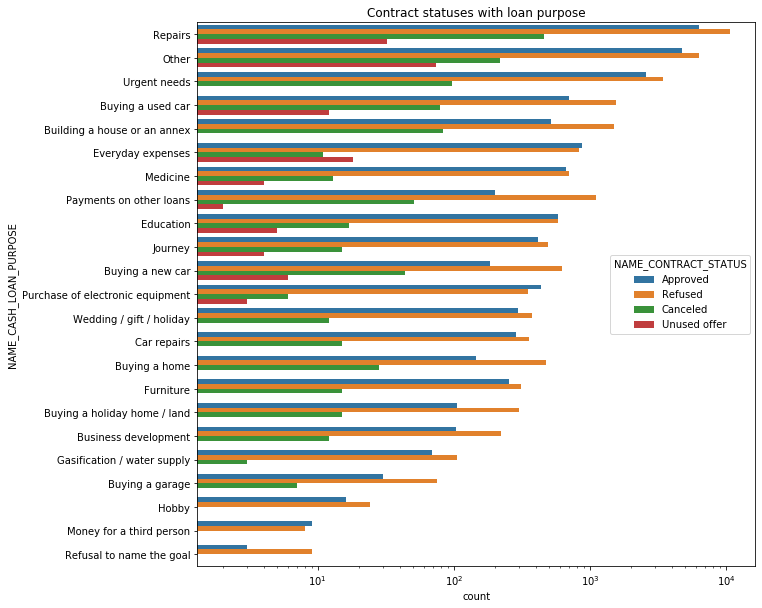

In [82]:
# Univariate Analysis
# Cash loan purpose vs contract status - NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS
plt.figure(figsize = (10,10))
sns.countplot(data = df, y = "NAME_CASH_LOAN_PURPOSE" , order = df.NAME_CASH_LOAN_PURPOSE.value_counts().index , hue = "NAME_CONTRACT_STATUS")
plt.title("Contract statuses with loan purpose")
plt.xscale('log')
plt.show()

1. The approval rate for 'Everyday expenses' , 'Money for third person' and 'purchase of electronic equipment' is higher than the rejection rate while for all others rejection rate seems to be higher.
2. For loan purpose of 'Eductaion' the approval and rejection rate are approximately similar.
3. The loan purposes 'Hobby', 'Money for a third person' and 'Refusal to name goal' doesn't have any cancelled loans.

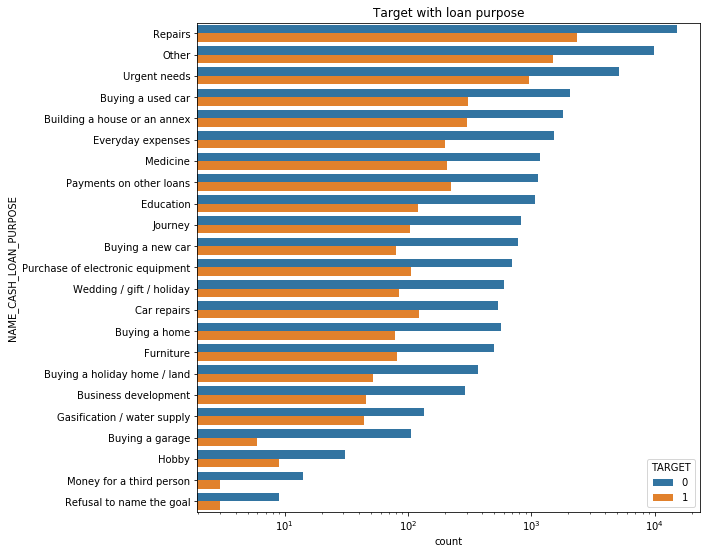

In [83]:
# Cash loan purpose vs target - NAME_CASH_LOAN_PURPOSE vs TARGET
plt.figure(figsize = (9,9))
sns.countplot(data = df, y = "NAME_CASH_LOAN_PURPOSE" , order = df.NAME_CASH_LOAN_PURPOSE.value_counts().index , hue = "TARGET")
plt.title("Target with loan purpose")
plt.xscale('log')
plt.show()

1. The cash loan puposes belonging to target 0 are more than that of target 1
2. Repairs loan purpose have the most number of clients with payment difficlulties.
3. 'Buying a garage' , 'Money for third person' and 'Refusal to name the goal' have higher loan payments than the difficulties in payment.

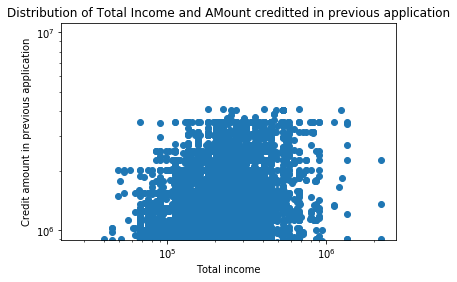

In [84]:
# Bivariate Analysis - Continuous - continuous
# Total Income - Previous credit amount - AMT_INCOME_TOTAL vs AMT_CREDIT_y
plt.scatter(data = df, x = "AMT_INCOME_TOTAL", y= "AMT_CREDIT_y")
plt.title("Distribution of Total Income and AMount creditted in previous application")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Total income")
plt.ylabel("Credit amount in previous application")
plt.show()

No significant conclusions can be made from the above scatter plot

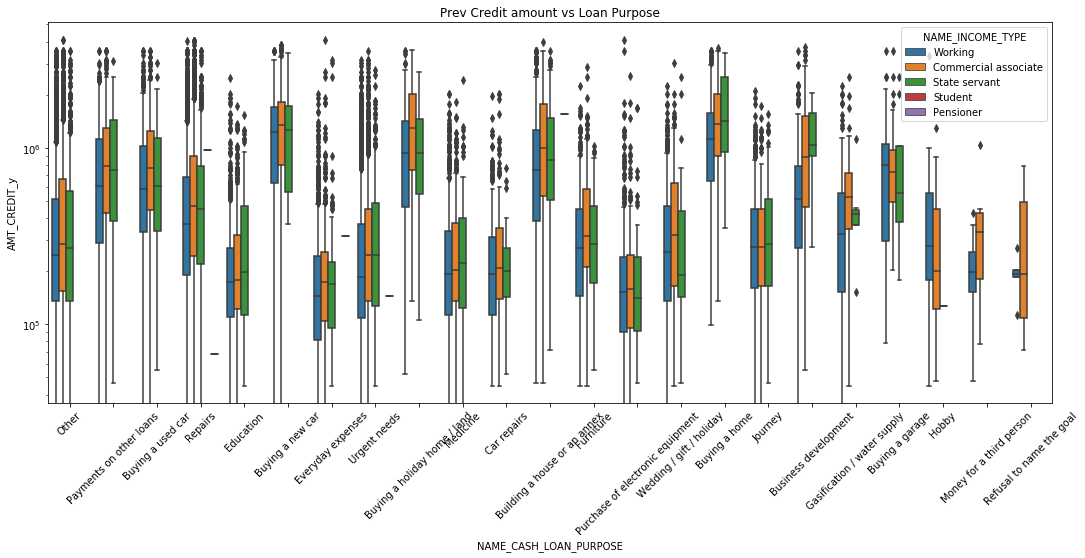

In [85]:
# Bivariate Analysis - Continuous - categorical
# cash loan purpose vs previous credit amount - NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT_y
plt.figure(figsize=(18,7))
sns.boxplot(data =df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_y',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

1. State servant income type have not taken any loans for the purpose of Hobby and Money for third person.
2. Student and pensioners income types doesn't have any significat previous credit amount for any purpose.
3. Outliers are significant for the income type "working".
4. for the purposes "Buying a home", "Buying a land" and "Buying a new car" have higher credit amount.
5. Seems like comercial associates and state servants have higher credit amount for most of the loan purposes.

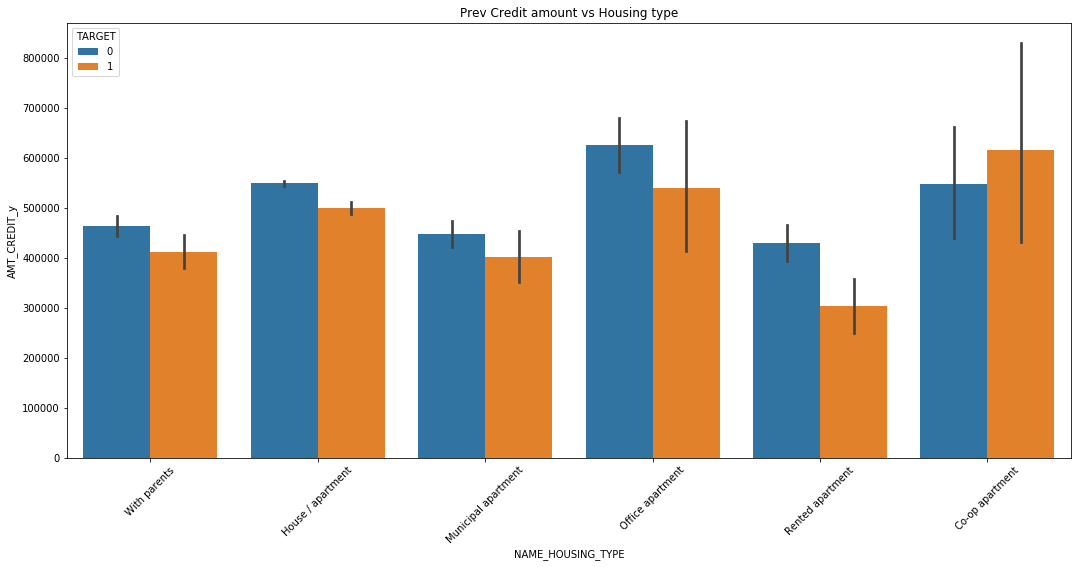

In [86]:
# Housing type vs previous credit amount - NAME_HOUSING_TYPE vs AMT_CREDIT_y
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.barplot(data =df, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

1. Clients with housing type as Office apartment seems to have higher credit and pay loans without difficulties.
2. Clients with Co-op apartment seems to have higher credit and more payment difficulties than other housing types.

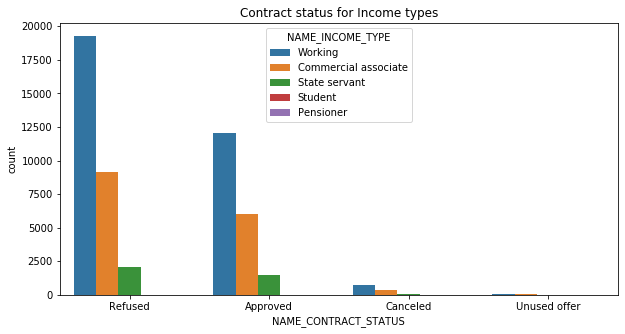

In [87]:
# Bivariate Analysis - categorical - categorical
# Income Type vs Contract status - NAME_INCOME_TYPE vs NAME_CONTRACT_STATUS 
plt.figure(figsize = (10,5))
sns.countplot(data= df, x ='NAME_CONTRACT_STATUS', order = df['NAME_CONTRACT_STATUS'].value_counts().index, hue ="NAME_INCOME_TYPE")
plt.title("Contract status for Income types")
plt.show()

1. Very few unused the offer from all the income types.
2. The approval rate and refusal rate are both higher for income type of "Working".

# Conclusion

1. Loans can be approved to any other housing type except "co-op apartment".
2. Bank should concentrate on the income types "student" and "pensioner" and also avoid "working" as they have more payment difficlulties.
3. Loans can be approved to clients with housing type "Office apartment" as they have maximum successful payments.
4. Bank needs to avoid clients with loan purpose of "Repairs" as they have more difficulties in payment.
5. Bank can approve the loans for clients with eductaion type as "Higher education" as they seem to have higher income and lower payment difficulties.